In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gaussianfunctions as gauss
from sklearn.mixture import GaussianMixture
import pandas as pd

In [11]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    return(em)

In [2]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')

### KIR2DL3

In [4]:
KIR2DL3_data=B['KIR2DL3'].to_numpy()

X=KIR2DL3_data

# Initial Parameters
a=({
    'Mean':1e-8,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':1,
    'Variance':0.01,
    'Weight':1/3
})
em=EMGMM(X,[])


In [5]:
em[-1]

[{'Mean': 0.03141614830835584,
  'Variance': 0.02321728604713408,
  'Weight': 0.12610015229257465},
 {'Mean': 0.6577988785722928,
  'Variance': 0.0006820507151592053,
  'Weight': 0.3695520215935361},
 {'Mean': 1.2526026193466873,
  'Variance': 0.0024452070607828887,
  'Weight': 0.5043478261138893}]

In [6]:
t=gauss.findThreshold1(X,gauss.BIC_gmm(X),em)
th=gauss.findThreshold2(X,gauss.BIC_gmm(X),em)
print(t,th)

[0.5564987994391839, 0.862573139130735] [0.5493823065023892, 0.8640795625227572]


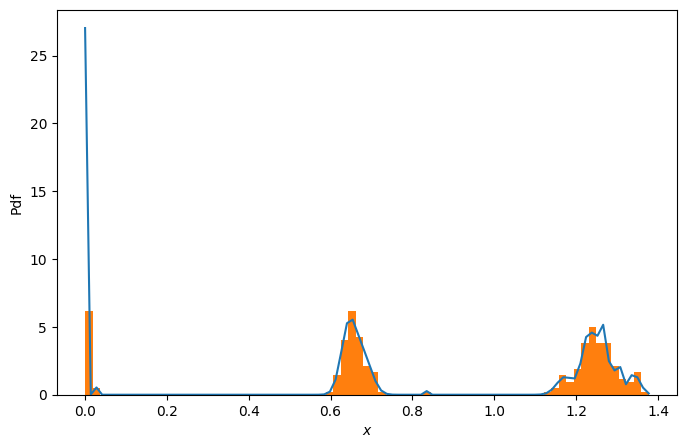

In [7]:
X=X.reshape(-1,1)
gm=GaussianMixture().fit(X)
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

# plt.plot(b,pdf1)
plt.plot(b,pdf1)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

In [8]:

# X = gauss.SimulateGMM(100,1,4,30,2)
X=X.reshape(-1,1)

N = np.arange(1, 11)

models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the BIC
BIC = [m.bic(X) for m in models]

M_best_BIC=models[np.argmin(BIC)]

gm=M_best_BIC.fit(X)
print(gm.means_,gm.covariances_,em[-1])

[[1.25260262]
 [0.00260318]
 [0.65987422]] [[[2.44620705e-03]]

 [[3.73193437e-05]]

 [[1.04253996e-03]]] [{'Mean': 0.03141614830835584, 'Variance': 0.02321728604713408, 'Weight': 0.12610015229257465}, {'Mean': 0.6577988785722928, 'Variance': 0.0006820507151592053, 'Weight': 0.3695520215935361}, {'Mean': 1.2526026193466873, 'Variance': 0.0024452070607828887, 'Weight': 0.5043478261138893}]


### KIR2DP1

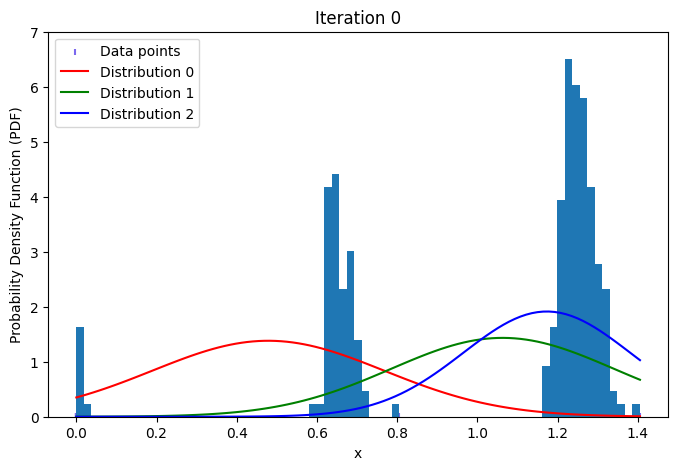

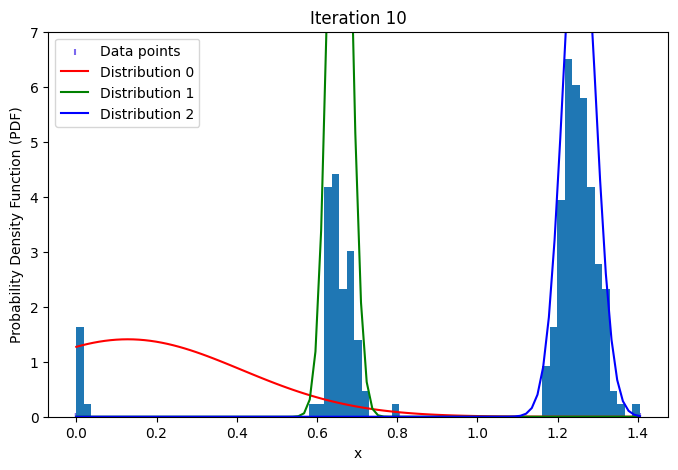

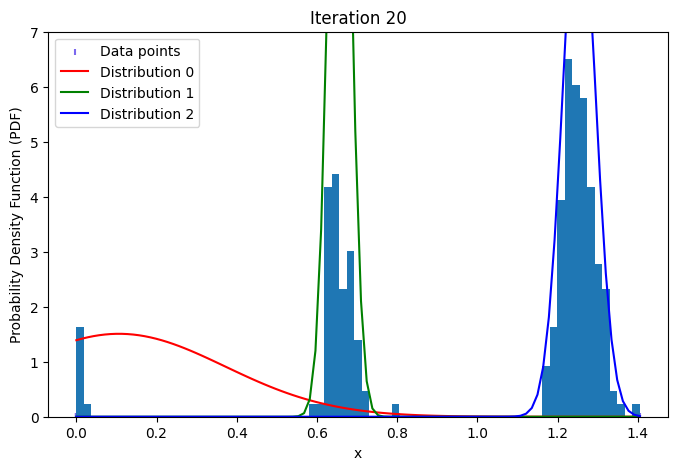

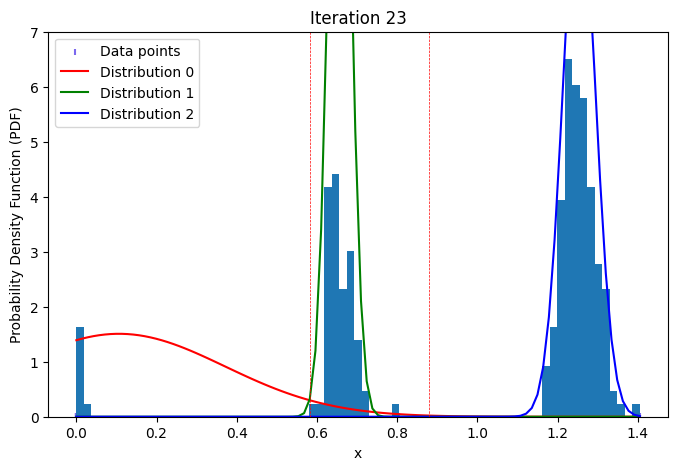

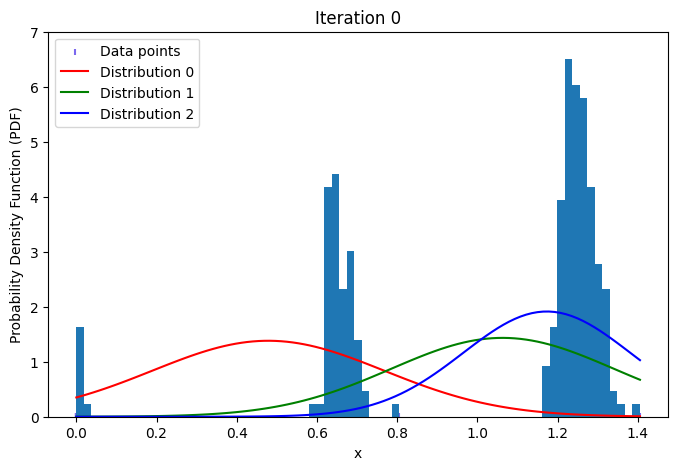

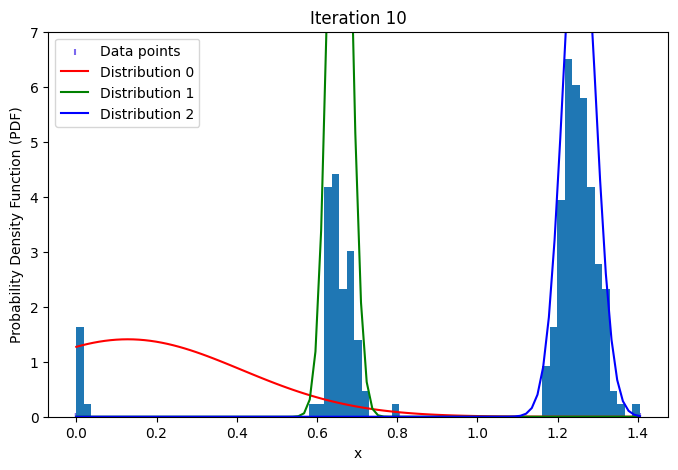

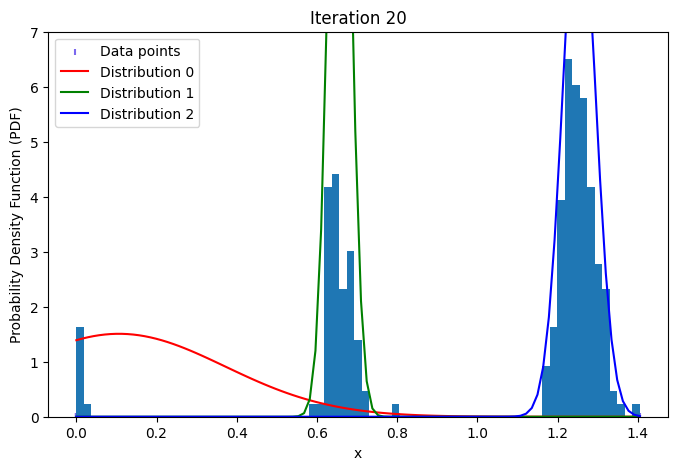

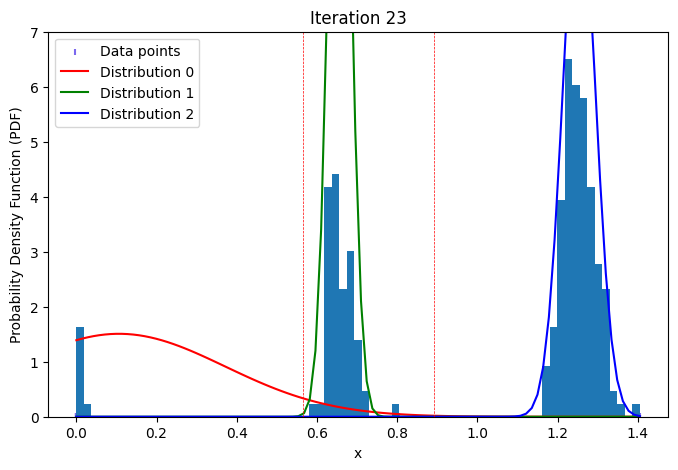

[{'Mean': 0.10617024498349764, 'Variance': 0.07000721383926607, 'Weight': 0.04016455307620434}, {'Mean': 0.6565035466916092, 'Variance': 0.0007246565026957662, 'Weight': 0.30331525086722677}, {'Mean': 1.2533949258810273, 'Variance': 0.0016881312305313163, 'Weight': 0.6565201960565689}] [0.5647476751511841, 0.8921278479389259]


In [16]:
KIR2DP1_data=B['KIR2DP1'].to_numpy()
initial=({
    'Mean':0.01,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':2,
    'Variance':0.01,
    'Weight':1/3
})
iter_data_KIR2DP1=EMGMM(KIR2DP1_data,[])
t=gauss.findThreshold1(KIR2DP1_data,gauss.BIC_gmm(KIR2DP1_data),iter_data_KIR2DP1)
th=gauss.findThreshold2(KIR2DP1_data,gauss.BIC_gmm(KIR2DP1_data),iter_data_KIR2DP1)
gauss.PlotGMM(KIR2DP1_data,iter_data_KIR2DP1,10,t,7)
gauss.PlotGMM(KIR2DP1_data,iter_data_KIR2DP1,10,th,7)

print(iter_data_KIR2DP1[-1],th)

In [3]:
def EM(X,n_components:int, initial_param):
    
    if initial_param==[]:
        def get_spaced_elm(X, n_components):
            spaced_elm = X[np.round(np.linspace(0, len(X)-1, n_components)).astype(int)]
            return spaced_elm
        
        initial_means=get_spaced_elm(np.sort(X),n_components)
        
        initial_param=list()
        for i in range(n_components):
            init_params={
            'Mean':initial_means[i],
            'Variance': 0.1,
            'Weight': 1/n_components
        }
            initial_param.append(init_params)

    epsilon=-1e-200 #to avoid singularities
    #stopping condition
    mean_delta=1e-6
    var_delta=1e-4
    weight_delta=1e-8

    max_iteration=50
    iteration=0

    iteration_param=list()

    while iteration<max_iteration:
        
        px_j=[]
        for j in range(n_components):
            px_j.append(gauss.GaussianPDF(X, initial_param[j]['Mean'], initial_param[j]['Variance']))
        px_j = np.array(px_j)
        
        posterior = []
        new_parameters=list()
        for j in range(n_components):
            #Calculate the probabilities of each data to belong from either gaussian  
            posterior.append((px_j[j] * initial_param[j]['Weight']) / (np.sum([px_j[i] * initial_param[i]['Weight'] for i in range(n_components)], axis=0)+epsilon))
        
        #Maximisation step (M-step):
            #Update the parameters
            mu=np.sum(posterior[j] * X) / (np.sum(posterior[j]+epsilon))
            
            # Constraint the variance
            newvar_temp=np.sum(posterior[j] * np.square(X - mu)) / (np.sum(posterior[j]+epsilon))
            if newvar_temp<0.01:
                newvar=newvar_temp
            else:
                newvar=initial_param[j]['Variance']

            new_param={
                'Mean':mu,
                'Variance':newvar,
                'Weight':np.mean(posterior[j])
            }
            new_parameters.append(new_param)

        #Calculate difference between parameters
        mean_diff=list()
        for i in range (n_components):
            mean_diff_indiv=(abs(new_parameters[i]['Mean']-initial_param[i]['Mean'])/(abs(initial_param[i]['Mean']+epsilon)))
            mean_diff.append(mean_diff_indiv)

        var_diff=list()
        for i in range(n_components):
            var_diff_indiv=(abs(new_parameters[i]['Variance']-initial_param[i]['Variance'])/abs(initial_param[i]['Variance']))
            var_diff.append(var_diff_indiv)

        weight_diff=list()
        for i in range(n_components):
            weight_diff_indv=(abs(new_parameters[i]['Weight']-initial_param[i]['Weight'])/abs(initial_param[i]['Weight']))
            weight_diff.append(weight_diff_indv)
        
        #Check if difference between iterations is less than the stopping criterion
        def check_less_than(list, value): 
            for x in list: 
                if value <= x: 
                    return False
            return True

        # Stop iterations if already satisfy the stopping condition
        if check_less_than(mean_diff,mean_delta) is True\
            and check_less_than(var_diff,var_delta) is True\
            and check_less_than(weight_diff, weight_delta) is True:
            break

        iteration+=1
        initial_param=new_parameters

        iteration_param.append(new_parameters)
    return(iteration_param)

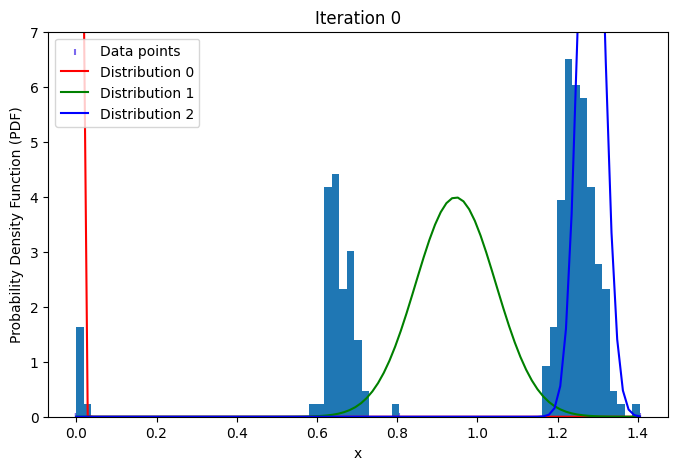

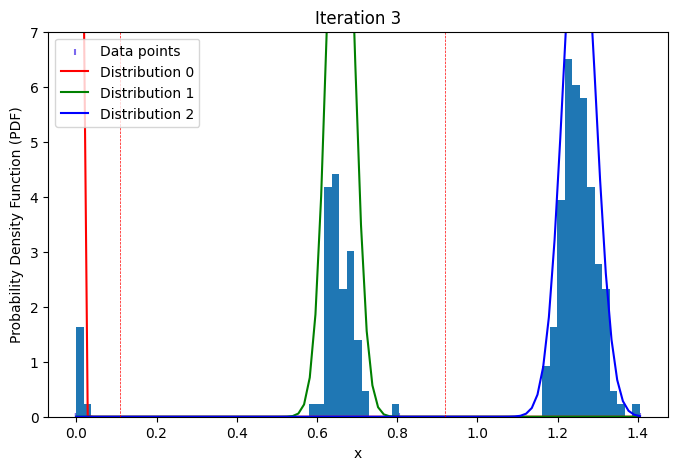

[{'Mean': 0.002518583472600959, 'Variance': 3.868808018115351e-05, 'Weight': 0.034782608695652174}, {'Mean': 0.6585849038914153, 'Variance': 0.0010252707379430023, 'Weight': 0.30869565217391304}, {'Mean': 1.253394903028379, 'Variance': 0.0016881418957206391, 'Weight': 0.6565217391304348}]


In [14]:
KIR2DP1_data=B['KIR2DP1'].to_numpy()
initial=({
    'Mean':0.01,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':2,
    'Variance':0.01,
    'Weight':1/3
})
iter_data_KIR2DP1=EM(KIR2DP1_data,3,initial)

t=gauss.findThreshold2(KIR2DP1_data,3,iter_data_KIR2DP1)

gauss.PlotGMM(KIR2DP1_data,iter_data_KIR2DP1,10,t,7)

print(iter_data_KIR2DP1[-1])

In [15]:
print(t)

[0.1090669088750108, 0.9179858618835375]


In [10]:
X=KIR2DP1_data.reshape(-1,1)

In [11]:
X=X.reshape(-1,1)

N = np.arange(1, 5)

models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the BIC
BIC = [m.bic(X) for m in models]

M_best_BIC=models[np.argmin(BIC)]

gm=M_best_BIC.fit(X)
print(gm.means_)
print(gm.covariances_)
print(iter_data_KIR2DP1[-1])

[[1.2533949 ]
 [0.6585849 ]
 [0.00251858]]
[[[1.68914190e-03]]

 [[1.02627074e-03]]

 [[3.96880802e-05]]]
[{'Mean': 0.1062323123133622, 'Variance': 0.07004124680804678, 'Weight': 0.04016898675399033}, {'Mean': 0.6565057233511385, 'Variance': 0.0007246544450363808, 'Weight': 0.3033139515710647}, {'Mean': 1.2533969841889148, 'Variance': 0.001688154858287509, 'Weight': 0.6565210277534098}]


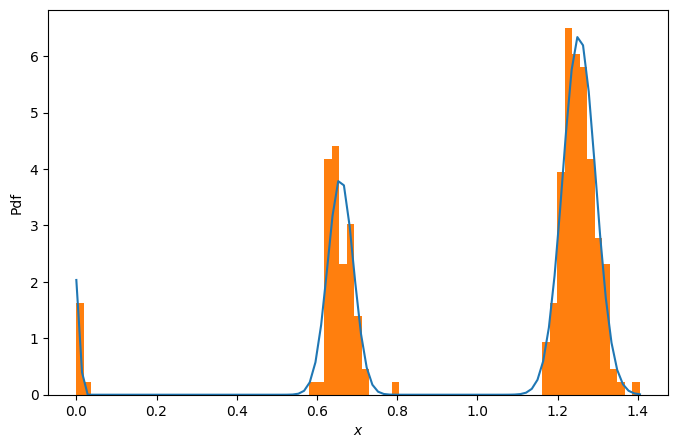

In [11]:
# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

plt.plot(b,pdf1)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

### KIR3DL1

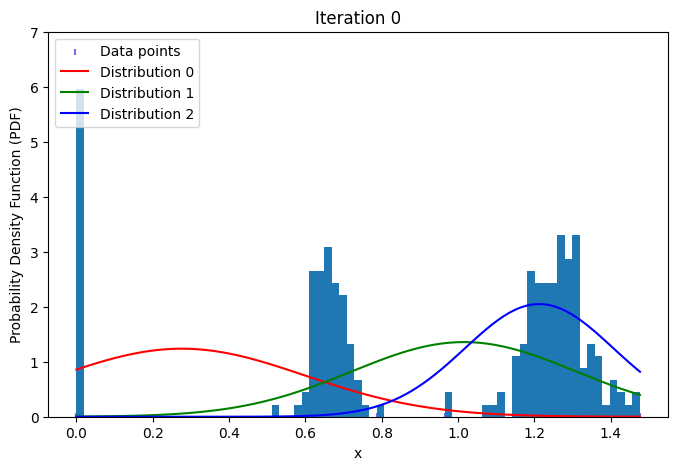

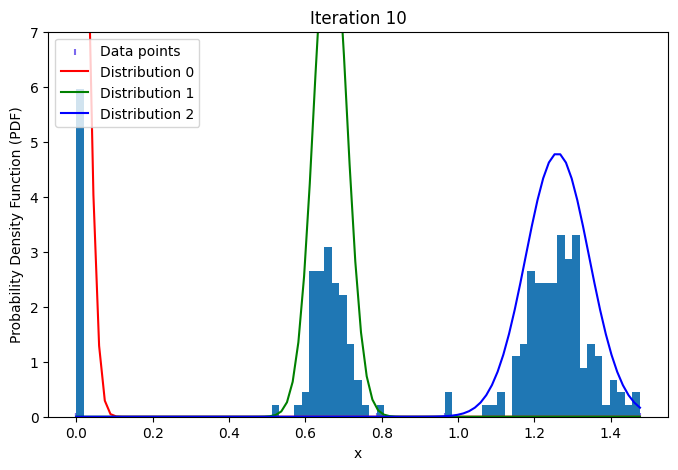

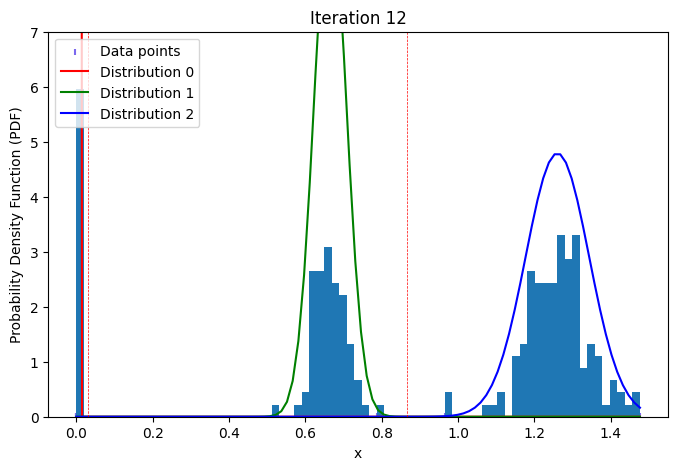

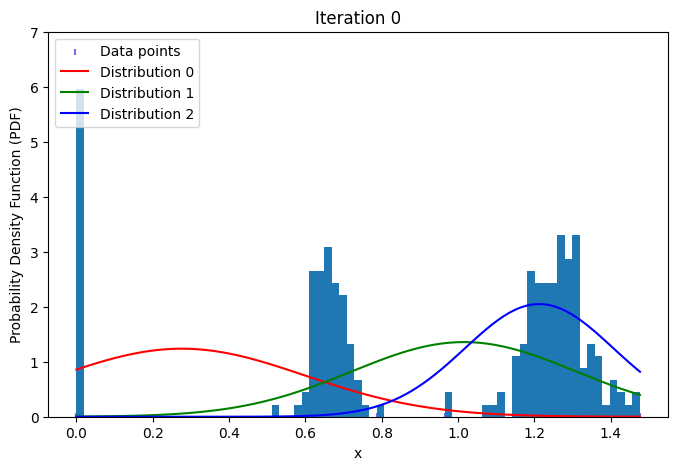

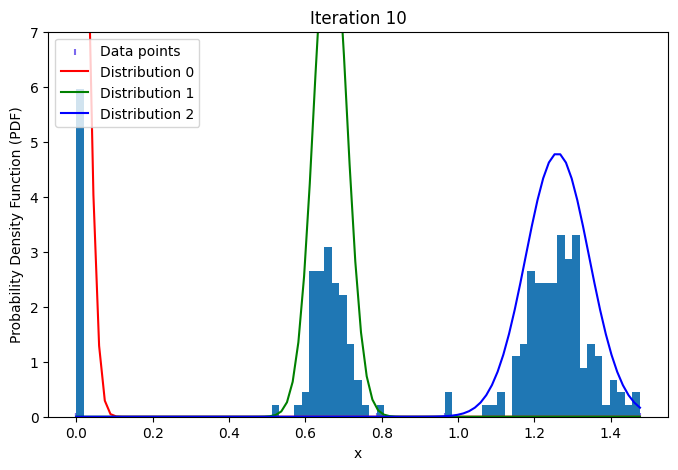

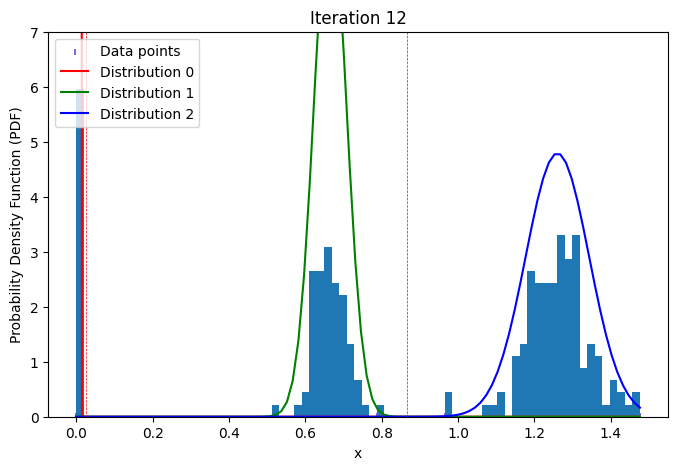

[0.029826126195467272, 0.8649576596685509] [0.026492202761768186, 0.8666725074780344]


In [16]:
KIR3DL1_data=B['KIR3DL1'].to_numpy()

em=EMGMM(KIR3DL1_data,[])
t=gauss.findThreshold1(KIR3DL1_data,gauss.BIC_gmm(KIR3DL1_data),em)
th=gauss.findThreshold2(KIR3DL1_data,gauss.BIC_gmm(KIR3DL1_data),em)
gauss.PlotGMM(KIR3DL1_data,em,10,t,7)
gauss.PlotGMM(KIR3DL1_data,em,10,th,7)
print(t,th)

### KIR2DS3

In [31]:
KIR2DS3_data=B["KIR2DS3"].to_numpy()

In [32]:
def PlotGMM2(X,iteration_data,plotper_iter:int,thresholds,ylimit):
    c=['red','green','blue','magenta']
    gmm_datapoints=np.linspace(np.min(X),np.max(X),100)
    for i in range(len(iteration_data)):
        if i%plotper_iter==0 or i==len(iteration_data)-1:
            #Set figure size, title, and plot the data points
            plt.figure(figsize=(8,5))
            plt.title("Iteration {}".format(i))
            plt.scatter(X, [0.005] * len(X), color='mediumslateblue', s=15, marker="|", label="Data points")
            plt.hist(X,bins=75,density=True)

            #Plot the estimated pdf
            for k in range(len(iteration_data[i])):
                plt.plot(gmm_datapoints, gauss.GaussianPDF(gmm_datapoints, iteration_data[i][k]['Mean'], iteration_data[i][k]['Variance']), color=c[k], label="Distribution {}".format(k))
            
            if ylimit==[]:
                pass
            else:
                plt.ylim(0,ylimit)
                
            #Set the x and y label
            plt.xlabel("x")
            plt.ylabel("Probability Density Function (PDF)")
            plt.legend(loc="upper left")
            
            if i==len(iteration_data)-1:
                for i in range (len(thresholds)):
                    plt.axvline(thresholds[i],c='red',ls='--',lw=0.5)

            plt.show()

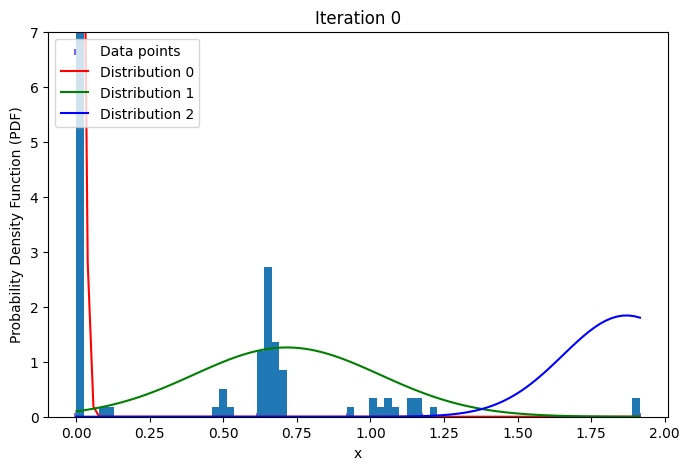

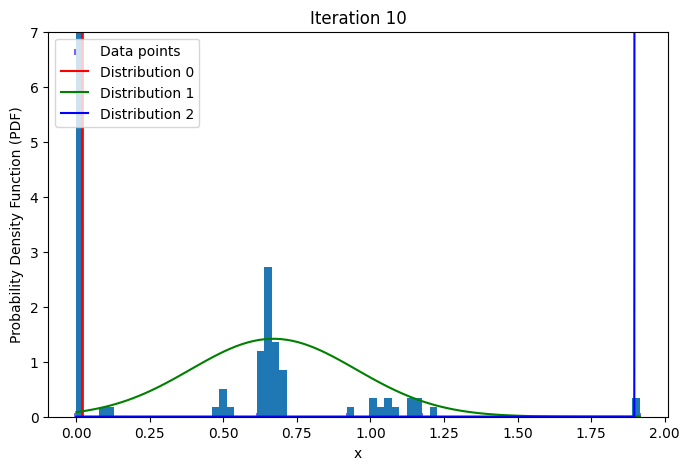

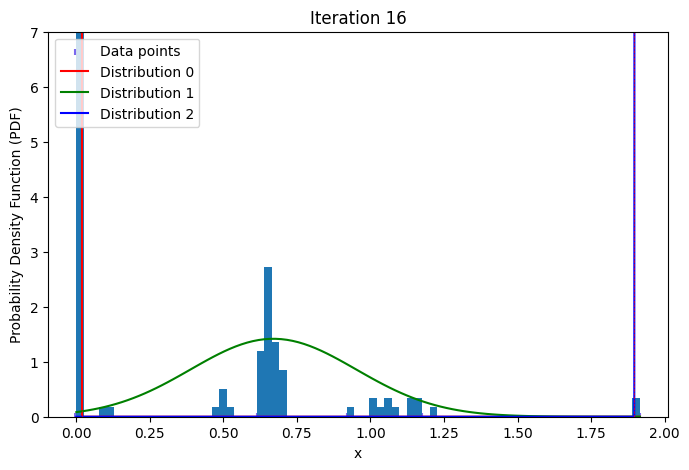

In [51]:
initial=({
    'Mean':0.01,
    'Variance':0.027,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.027,
    'Weight':1/3
},{
    'Mean':2,
    'Variance':0.027,
    'Weight':1/3
})
iteration_data_KIR2DS3=EMGMM(KIR2DS3_data,initial)
t=gauss.findThreshold(KIR2DS3_data,gauss.BIC_gmm(KIR2DS3_data),iteration_data_KIR2DS3)
PlotGMM2(KIR2DS3_data,iteration_data_KIR2DS3,10,t,7)

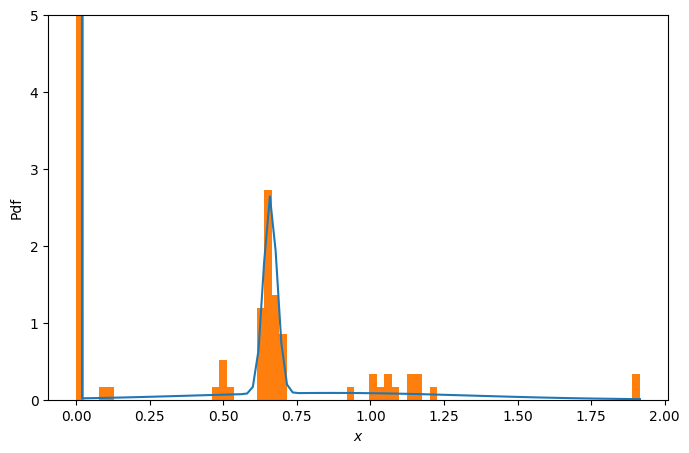

In [49]:
X=KIR2DS3_data.reshape(-1,1)
gm=GaussianMixture().fit(X)
N = np.arange(1, 6)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

plt.plot(b,pdf1)
plt.ylim(0,5)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

In [50]:
np.sort(M_best_BIC.predict(X))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])